# Определение успешной игры для запуска новой рекламной компании


В работу поступил датасет, который содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  

Нам нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Чтобы определить правильные закономерности выполним следующие этапы:
1. Загрузку и предобработку данных;
2. Исследовательский анализ;
3. Составим портреть пользователя для каждого региона;
4. Проверим гипотезы.

## Загрузка и предобработка данных

Для начала импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy import stats as st

Откроем датасет с данными

In [2]:
data = pd.read_csv('/datasets/games.csv')

Выведем первые 5 строк на экран, чтобы убедиться, что файл загрузился

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем размер и информацию о датасете

In [4]:
data.shape

(16715, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет имеет 16715 строк и 11 столбцов
В некоторых столбцах есть пропущенные значения, разберемся с ними

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

После проверки на пустые ячейки видно, что:  
1) в графе **"Название"** в двух строчках отсутсвуют значения;  
2) в графе **"Дата выхода"**  в 269 строчках отсутсвуют значения;  
3) в графе **"Оценка критиков"**  в 8578 строчках отсутсвуют значения;  
4) в графе **"Оценка пользователей"**  в 6701 строчках отсутсвуют значения;  
5) в графе **"Рейтинг от организации ESRB"**  в 6766 строчках отсутсвуют значения;

Посмотрим сколько пропущенных значений в процентах.

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


Приведем название столбцов к нижнему регистру:

In [8]:
data.columns = data.columns.str.lower()

Выведем на экран названия столбцов, чтобы убедться в изменении

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Работа со столбцом **"Дата выхода"**
Проверим, почему в столбце **"Дата выхода"** данные с типом Float.  
Выведем список уникальных значений на экран

In [11]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалим игры без даты выхода, т.к. количество таких игр менее 5% датасета

In [13]:
data = data[~(data['year_of_release'].isna())]

In [14]:
data.year_of_release = data.year_of_release.astype(int)

In [15]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

### Работа со столбцом **Название**
Посмотрим какие пропуски есть в столбце **Название**

In [16]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
data.groupby(by='platform').agg('count')

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
2600,116,116,116,116,116,116,116,0,0,0
3DO,3,3,3,3,3,3,3,0,0,0
3DS,512,512,512,512,512,512,512,166,225,223
DC,52,52,52,52,52,52,52,14,14,14
DS,2121,2121,2121,2121,2121,2121,2121,708,1256,1255
GB,97,97,97,97,97,97,97,0,0,0
GBA,811,811,811,811,811,811,811,430,509,514
GC,542,542,542,542,542,542,542,437,457,457
GEN,27,29,27,29,29,29,29,0,0,0


Удалим строки, в которых пропуск в столбце **Название игры**, т.к. это небольшая доля от всего датасета и игры вышли в 1993 году и продаж практически не было.

In [18]:
data = data[~(data['name'].isna())]

In [19]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

### Проверим датасет на наличие явных дубликатов

In [20]:
data.duplicated().sum()

0

Полных дубликатов не обнаружено.  
Проверим наличие явных и не явных дубликатов в столбце **Name**

In [21]:
data[data['name'].duplicated()].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
1785,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
...,...,...,...,...,...,...,...,...,...,...,...
3304,pro evolution soccer 2011,X360,2010,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E
4664,pro evolution soccer 2011,PS2,2010,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
12648,pro evolution soccer 2011,PC,2010,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN


Видно, что есть дубликаты в названиях игр, но они выпущены на разных платформах

### Проверим пропуски и характер значений в столбцах с оценками

#### Проведем анализ столбца **Оценки критиков**

In [22]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [23]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [24]:
bins_critic = (data['critic_score'].max()) - (data['critic_score'].min())
bins_critic

85.0

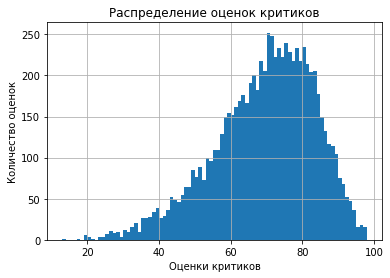

In [25]:
data['critic_score'].hist(bins = (int((data['critic_score'].max()) - (data['critic_score'].min()))), range=(data['critic_score'].min(),data['critic_score'].max()))
plt.xlabel("Оценки критиков")
plt.ylabel("Количество оценок")
plt.title("Распределение оценок критиков")
plt.show()

По имеющимся оценкам критиков можно увидеть, что:  
- минимальная оценка 13
- максимальная оценка 98
- средняя 68,96
- медиана - 71.
Максимальное количество оценок в диапозоне 70-80

#### Проведем анализ столбца **Оценки польщователей**

In [26]:
data['user_score'].isna().sum()

6605

In [27]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [28]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [29]:
data.groupby(by='user_score').agg('count')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,rating
user_score,,,,,,,,,,
0,1,1,1,1,1,1,1,1,0,1
0.2,2,2,2,2,2,2,2,2,0,2
0.3,2,2,2,2,2,2,2,2,0,2
0.5,2,2,2,2,2,2,2,2,2,2
0.6,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...
9.4,11,11,11,11,11,11,11,11,11,11
9.5,5,5,5,5,5,5,5,5,4,5
9.6,2,2,2,2,2,2,2,2,2,2


2424 игры имеют оценку пользователей TBD.  
Проверим как распределена эта оценка по годам и посмотрю какие суммарные продажи этих игр, чтобы проверить гипотезу, что эти игры без оценок от пользователей, т.к. их не покупают

In [30]:
data[data['user_score']=='tbd'].groupby(by='year_of_release').agg({'user_score':'count', 'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum'})

,user_score,na_sales,eu_sales,jp_sales,other_sales
year_of_release,,,,,
1997,1,0.03,0.02,0.00,0.00
1999,8,3.25,0.88,0.00,0.15
2000,43,7.31,5.15,0.32,1.14
2001,82,12.07,6.51,0.28,1.23
2002,192,16.97,7.11,0.25,1.12
2003,95,9.80,4.03,0.00,0.67
2004,107,14.93,5.98,0.46,0.81
2005,121,12.92,4.81,0.18,1.08
2006,124,10.17,2.58,1.39,1.10


Основное количество игр с оценкой  пользователей = **TBD** приходится на 2008-2011 год. Пик в 2009 году - 405 игр 

Заменим TBD на NAN, т.к. по сути оценка не известна. Заменить рейтинг медианой или средним считаю не корректным

In [31]:
data.loc[data['user_score']=='tbd','user_score'] = np.nan

Переведем тип во **float**

In [32]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Очень хорошо)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [34]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

#### Проведем анализ столбца **Рейтинг**

In [35]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [36]:
data.groupby(by='rating').agg('count')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
rating,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1
E,3921,3921,3921,3921,3921,3921,3921,3921,2756,2338
E10+,1393,1393,1393,1393,1393,1393,1393,1393,1097,1026
EC,8,8,8,8,8,8,8,8,0,1
K-A,3,3,3,3,3,3,3,3,1,3
M,1536,1536,1536,1536,1536,1536,1536,1536,1457,1492
RP,1,1,1,1,1,1,1,1,1,1
T,2905,2905,2905,2905,2905,2905,2905,2905,2589,2518


Из группировки могу видно, что всего 8 групп, самые основные Е, Е10+, М и Т. 

для дальнейшей корректной работы с данными "рейтинг" поставлим заглушку = заменим **NAN** на **unknown**

In [37]:
data.rating = data.rating.fillna('unknown')

<b>Обработка пропусков:</b>    
    
1) В слолбце <b>name</b> строки с пропусками были удалены. Всего таких строк было 2. Заполнять пропуски в данном столбце не предоставляется возможным, т.к. это название самой игры. Причины появления пропуска в данном столбце могли стать "механическое" затирание данных. Учитывая, что год выхода этих игр - 1993 - невозможно установить причину.    
    
2) В столбце  <b>year_of_release</b> строки с пропусками были удалены. Можно было попытаться из названий части игр "вытащить" год выхода игры, но не факт, что это было бы корректно. Пропуски могли появиться из-за ошибок в момент "сборки" данных в одну таблицу.    

3) В столбцах  <b>critic_score и user_score</b> пропуски оставил без изменения, т.к. посчитал некорректным заполнять их медианными значениями. Пропуски в данном поле могут означать, что игры не оценивались ни критиками, ни пользователями, либо данные были обнулены "механически" при подготовке датасета.   

4) В столбце  <b>rating</b> пропуски заполнил "заглушкой", т.к. посчитал что если анализировать с пропусками, то можно потерять данные при анализе. Пропуски в данном поле могут означать, что игры не получали рейтинг, либо данные были обнулены "механически" при подготовке датасета.   
</div>    

### Посчитаем суммарные продажи для всех регионов. Для этого создам столбец total_sales

In [38]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [39]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Выведем основные парамерты по столбцу **total_sales**

In [40]:
data['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Максимальный объем продаж у игры **Wii Sports** - 82 млн проданных копий  
средний объем продаж - 0.53 млн копий  
медиана - 0.17 млн копий.
Есть игры у которых вообще не было продаж. Посмотрим какое их количество

In [41]:
data[data['total_sales']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0


Таких всего 2 игры

## Исследовательский анализ данных

### Проверим сколько игр выпускалось в разные годы, чтобы определить важны ли данные за все периоды?

In [42]:
data.pivot_table(index='year_of_release', values='name', aggfunc={'name':'count'}).reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


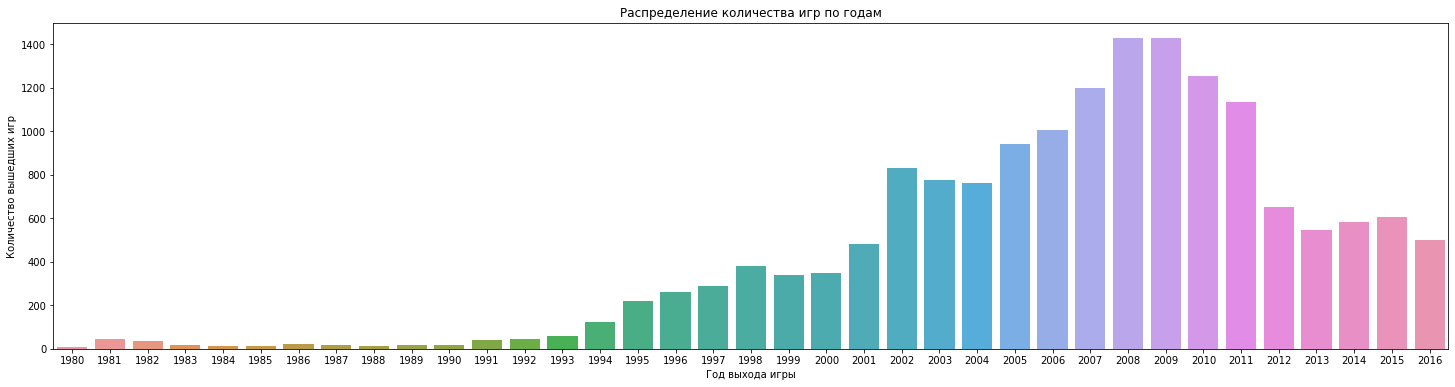

In [43]:

plt.figure(figsize=(25,6))
(
sns.barplot(data=data.pivot_table(index='year_of_release', values='name', aggfunc={'name':'count'})
            .reset_index(), 
            x='year_of_release', 
            y='name')
)
plt.xlabel("Год выхода игры")
plt.ylabel("Количество вышедших игр")
plt.title("Распределение количества игр по годам")
plt.show()

Из таблицы/графика видно, что до 2011 года идет плавный рост количества выпускаемых игр, начиная с 2012 года идет резкое падение, практически в 2 раза и до 2016 года идет спад

### Посмотрим как менялись продажи по платформам.  
Выберем платформы с наибольшими суммарными продажами и построю распределение по годам. 

In [44]:
data.pivot_table(index=['platform','year_of_release'], values=['total_sales'], aggfunc={'total_sales':'sum'}).reset_index()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


Вычислим платформы имебющие наибольшее количество продаж и сохраню в отдельный датаффрейм

In [45]:
popular_platforms = data.groupby(by='platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index()
popular_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [46]:
popular_platforms = popular_platforms.loc[popular_platforms['total_sales']>500,'platform']
popular_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

Проверим на каких платформах выпускались игры за последние 4 года (с 2013)

In [47]:
data_platforms_year = (
data.loc[data['year_of_release'] >= 2013]
    .groupby(by='platform')
    .agg({'total_sales':'sum'})
    .reset_index().sort_values(by='total_sales',ascending=False)
)
data_platforms_year

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


Наибольшее количество продаж имеют приставки PS4, PS3, XOne, 3D3 и Х360

### **Построим распределение продаж по годам среди 6 популярных платформ за все время и за последние 4 года:**

Напишем функцию, которая будет строить график по срезу датасета по заданнной платформе.  
График будет показывать количество проданных игр по годам

In [2]:
def func_barplot(data, platform, x=6,y=4):
    plt.figure(figsize=(x,y))
    (
    sns.barplot(data=data[data['platform']==platform]
                .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
                .reset_index(),
                x='year_of_release', 
                y='total_sales')
    )    

Для PS2

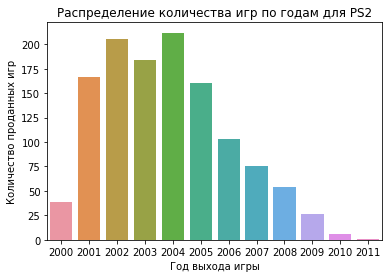

In [49]:
chart = func_barplot(data, 'PS2')
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для PS2")
plt.show()

Для **X360**

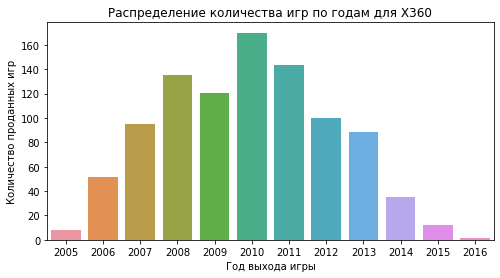

In [50]:
chart = func_barplot(data, 'X360', 8,4)
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для Х360")
plt.show()

Для **PS3**

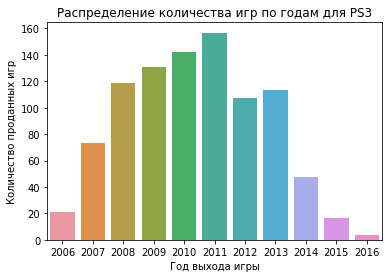

In [51]:
chart = func_barplot(data, 'PS3')
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для PS3")
plt.show()

Для **Wii**

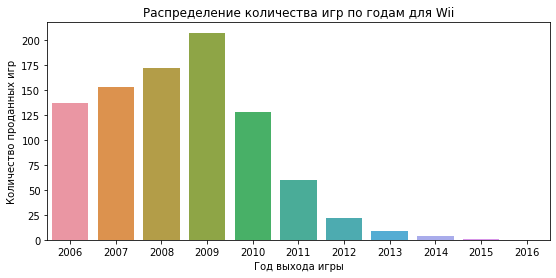

In [52]:
chart = func_barplot(data, 'Wii', 9,4)
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для Wii")
plt.show()

Для **DS**

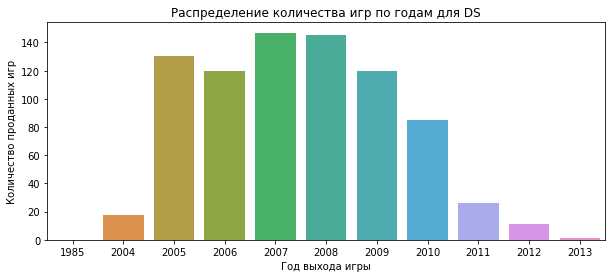

In [53]:
chart = func_barplot(data, 'DS',10,4)
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для DS")
plt.show()

Для **PS**

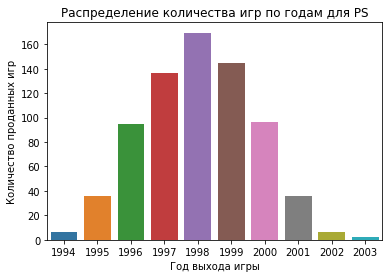

In [54]:
chart = func_barplot(data, 'PS')
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для PS")
plt.show()

Проверим на киких платформах вообще выходили игры после 2013 года

In [55]:
(
data[data['year_of_release']>=2012]
    .pivot_table(index='platform', values='total_sales')
    .sort_values(by='total_sales',ascending=False)
)

,total_sales
platform,
X360,0.810068
PS4,0.801378
Wii,0.655000
XOne,0.645020
PS3,0.585781
WiiU,0.559116
3DS,0.491439
DS,0.404839
PC,0.250600


PS4, PS3, XOne, 3D3 и Х360

Для **PS4**

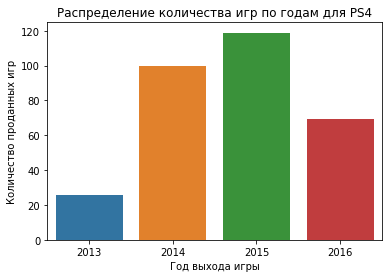

In [56]:
chart = func_barplot(data, 'PS4')
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для PS4")
plt.show()

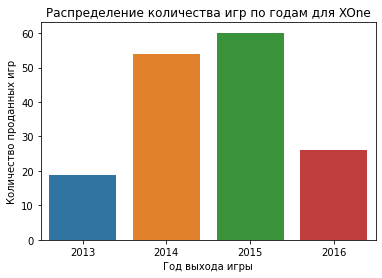

In [57]:
chart = func_barplot(data, 'XOne')
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для XOne")
plt.show()

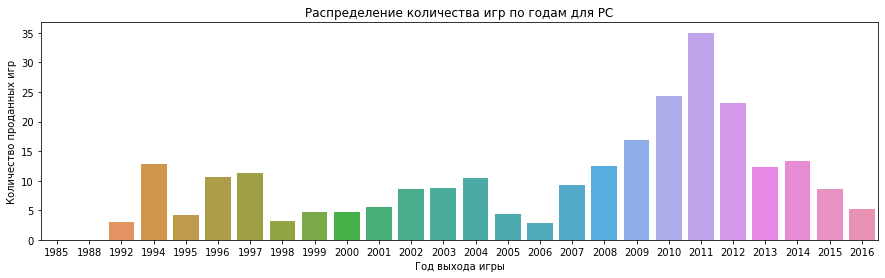

In [58]:
chart = func_barplot(data, 'PC', 15,4)
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для PC")
plt.show()

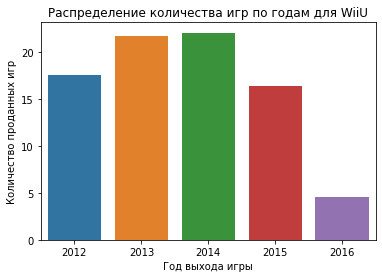

In [59]:
chart = func_barplot(data, 'WiiU')
plt.xlabel("Год выхода игры")
plt.ylabel("Количество проданных игр")
plt.title("Распределение количества игр по годам для WiiU")
plt.show()

Из графиков видно, что среднее время "жизни" популярности платформы 5 лет, затем ее продажи начинают падать.  
Возьмем данные за последние 4 года, чтобы делать прогноз на 5ый

In [60]:
data = data[data['year_of_release']>2013]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


### Построим график с усами по глобальным продажам игр в разбивке по платформам

In [62]:
data.groupby(by='platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


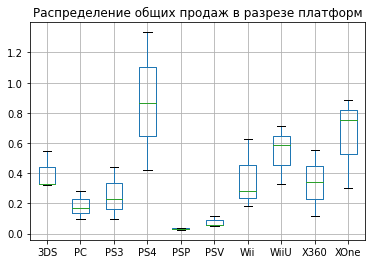

In [63]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales').boxplot();
plt.title('Распределение общих продаж в разрезе платформ');

Из графика и числового описания данных видно, что:  
- Наибольшее количество продаж у платформы **PS4**
- Наименее у **PSP и PSV**

In [64]:
data[data['total_sales'] > 6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Посмотрим как влияют на продажи внутри платформы **PS4** отзывы пользователей и критиков.  
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Посмотрим зависимость от оценки критиков

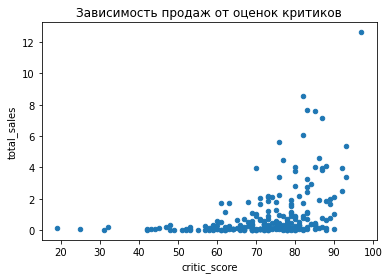

In [65]:
data[data['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок критиков');

In [66]:
data.loc[data['platform']=='PS4','critic_score'].corr(data['total_sales'])

0.40266141068104083

Зависимость продаж от оценок критиков прямая, но очень слабая

Посмотрим зависимость от оценки пользователей

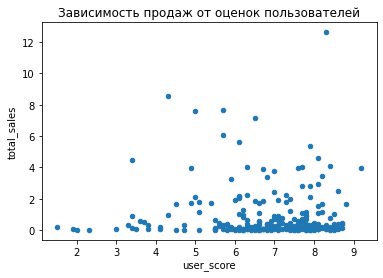

In [67]:
data[data['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter');
plt.title('Зависимость продаж от оценок пользователей');

In [68]:
data.loc[data['platform']=='PS4','user_score'].corr(data['total_sales'])

-0.040131589472697356

Зависимость продаж от оценок пользователей практически отсутствует

Посмотрим взаимосвязь оценок на платформах **XOne** и **WiiU**

**WiiU**

от оценок критиков

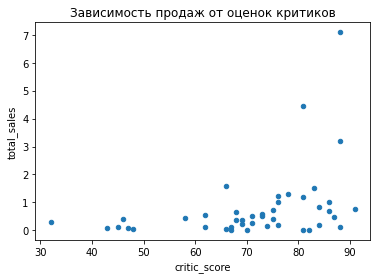

In [69]:
data[data['platform']=='WiiU'].plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('Зависимость продаж от оценок критиков');

In [70]:
data.loc[data['platform']=='WiiU','critic_score'].corr(data['total_sales'])

0.370201412480884

Зависимость продаж от оценок критиков прямая, но очень слабая

от оценок пользователей

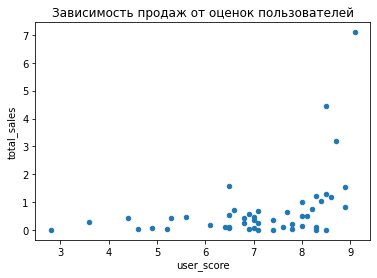

In [71]:
data[data['platform']=='WiiU'].plot(x='user_score', y='total_sales', kind='scatter');
plt.title('Зависимость продаж от оценок пользователей');

In [72]:
data.loc[data['platform']=='WiiU','user_score'].corr(data['total_sales'])

0.40792645792170773

Зависимость продаж от оценок пользователей прямая, но очень слабая

**XOne**

от оценок критиков

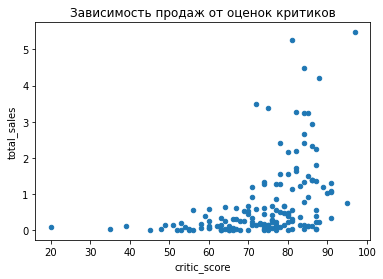

In [73]:
data[data['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('Зависимость продаж от оценок критиков');

In [74]:
data.loc[data['platform']=='XOne','critic_score'].corr(data['total_sales'])

0.42867694370333226

Зависимость продаж от оценок критиков прямая, но очень слабая

от оценок пользователей:

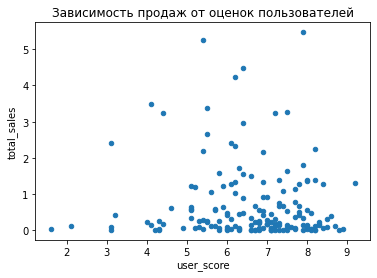

In [75]:
data[data['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок пользователей');

In [76]:
data.loc[data['platform']=='XOne','user_score'].corr(data['total_sales'])

-0.0703839280647581

Зависимость продаж от оценок пользователей практически отсутствует

В результате анализа корреляции увидел, что:    
    
<b>Для PS4:</b>    
Зависимость продаж от оценок критиков прямая, но очень слабая. Коэф. корреляции 0.4;    
Зависимость продаж от оценок пользователей практически отсутствует Коэф. корреляции -0.04;    
<b>Для XOne:</b>    
Зависимость продаж от оценок критиков прямая, но очень слабая. Коэф. корреляции 0.42;    
Зависимость продаж от оценок пользователей практически отсутствует. Коэф. корреляции -0.07;    
<b>Для WiiU:</b>    
Зависимость продаж от оценок критиков прямая, но очень слабая. Коэф. корреляции 0.37;    
Зависимость продаж от оценок пользователей прямая, но очень слабая. Коэф. корреляции 0.4;    

Таким образом можно сделать выводы:
- у рассматриваемых платформ присутствует прямая, но слабая корреляция с оценками критиков, 
- только для WiiU есть слабая прямая корреляция с оценками пользователей.  
- для PS4 и XOne зависимости продаж от оценок пользователей отсутствует;

### Посмотрим на общее распределение игр по жанрам

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим сводную таблицу. В строках будут жанры, столбцы - регионы, значения - медианы продаж по жанрам в регионе

In [77]:
data_genre = (
data.pivot_table(index='genre', values=['total_sales','na_sales','eu_sales','jp_sales'], aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)

In [78]:
data_genre

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Shooter,0.220,0.00,0.220,0.515
1,Sports,0.050,0.00,0.070,0.180
2,Platform,0.055,0.00,0.075,0.140
3,Fighting,0.020,0.03,0.040,0.125
4,Role-Playing,0.010,0.05,0.020,0.110
5,Simulation,0.030,0.00,0.000,0.100
6,Action,0.020,0.01,0.010,0.090
7,Misc,0.010,0.01,0.010,0.090
8,Racing,0.050,0.00,0.030,0.090
9,Strategy,0.010,0.00,0.000,0.060


In [79]:
data_genre['total_part'] = (data_genre['total_sales']/data_genre.total_sales.sum()).round(2)

In [80]:
data_genre

,genre,eu_sales,jp_sales,na_sales,total_sales,total_part
0,Shooter,0.220,0.00,0.220,0.515,0.33
1,Sports,0.050,0.00,0.070,0.180,0.11
2,Platform,0.055,0.00,0.075,0.140,0.09
3,Fighting,0.020,0.03,0.040,0.125,0.08
4,Role-Playing,0.010,0.05,0.020,0.110,0.07
5,Simulation,0.030,0.00,0.000,0.100,0.06
6,Action,0.020,0.01,0.010,0.090,0.06
7,Misc,0.010,0.01,0.010,0.090,0.06
8,Racing,0.050,0.00,0.030,0.090,0.06
9,Strategy,0.010,0.00,0.000,0.060,0.04


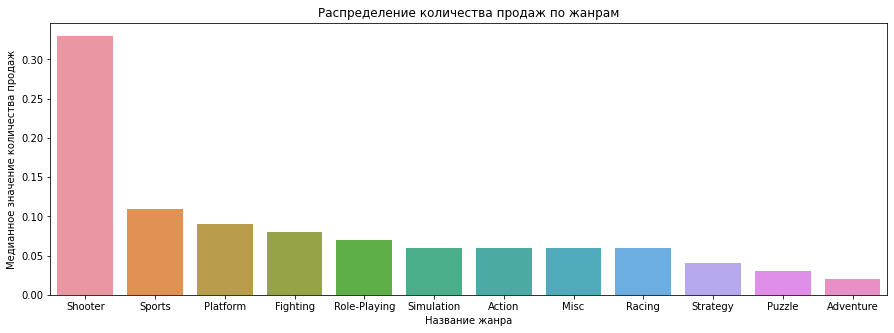

In [81]:
plt.figure(figsize=(15,5))
sns.barplot(data=data_genre, x='genre', y='total_part')
plt.xlabel("Название жанра")
plt.ylabel("Медианное значение количества продаж")
plt.title("Распределение количества продаж по жанрам")
plt.show()

Из полученных результатов видно, что жанр **Shooter** имеет наибольшую долю продаж, которая составляет 33%  
На втором месте жанр **Sports**, который имеет долю продаж 11%  
На третьем и четвертом месте с небольшой разницей жанры **Platform и Fighting** с долями 9 и 8% соотетственно.  
Наименьщие доли продаж имеют жанры **Puzzle, Strategy и Adventure**

## Составим портрет пользователя каждого региона

### Оределим топ 5 платформ для каждого региона продаж

Сделаем сводную таблицу по платформам и в значениях укажем сумму продаж в регионе

In [82]:
data_region = (
    data.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
    .reset_index()
)
data_region

,platform,eu_sales,jp_sales,na_sales
0,3DS,16.12,44.24,22.64
1,PC,17.97,0.00,7.23
2,PS3,25.54,11.22,22.05
3,PS4,130.04,15.02,98.61
4,PSP,0.00,0.36,0.00
5,PSV,3.53,14.54,2.52
6,Wii,2.59,0.00,2.08
7,WiiU,13.15,7.31,19.36
8,X360,15.49,0.08,28.30
9,XOne,46.25,0.32,81.27


In [83]:
data_region.insert(loc=2, column = 'eu_sales_part', value = data_region.eu_sales/data_region.eu_sales.sum())

In [84]:
data_region.insert(loc=4, column = 'jp_sales_part', value = data_region.jp_sales/data_region.jp_sales.sum())

In [85]:
data_region.insert(loc=6, column = 'na_sales_part', value = data_region.na_sales/data_region.na_sales.sum())

In [86]:
data_region

,platform,eu_sales,eu_sales_part,jp_sales,jp_sales_part,na_sales,na_sales_part
0,3DS,16.12,0.059554,44.24,0.475239,22.64,0.079701
1,PC,17.97,0.066388,0.00,0.000000,7.23,0.025452
2,PS3,25.54,0.094355,11.22,0.120529,22.05,0.077624
3,PS4,130.04,0.480420,15.02,0.161349,98.61,0.347145
4,PSP,0.00,0.000000,0.36,0.003867,0.00,0.000000
5,PSV,3.53,0.013041,14.54,0.156193,2.52,0.008871
6,Wii,2.59,0.009568,0.00,0.000000,2.08,0.007322
7,WiiU,13.15,0.048581,7.31,0.078526,19.36,0.068155
8,X360,15.49,0.057226,0.08,0.000859,28.30,0.099627
9,XOne,46.25,0.170866,0.32,0.003438,81.27,0.286102


Посмотрим топ 5 в регионе EU

  platform  eu_sales_part
3      PS4       0.480420
9     XOne       0.170866
2      PS3       0.094355
1       PC       0.066388
0      3DS       0.059554


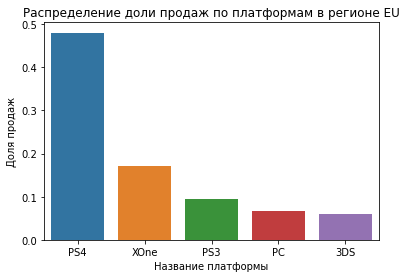

  platform  jp_sales_part
0      3DS       0.475239
3      PS4       0.161349
5      PSV       0.156193
2      PS3       0.120529
7     WiiU       0.078526


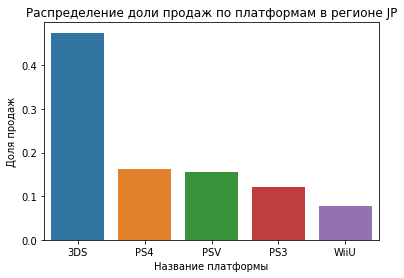

  platform  na_sales_part
3      PS4       0.347145
9     XOne       0.286102
8     X360       0.099627
0      3DS       0.079701
2      PS3       0.077624


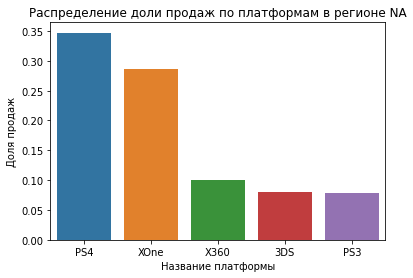

In [87]:
for i in ['eu_sales_part','jp_sales_part','na_sales_part']:
    print(data_region.loc[:,['platform',i]].sort_values(by=i,ascending=False).head(5))
    sns.barplot(data=data_region.loc[:,['platform',i]].sort_values(by=i,ascending=False).head(5), x='platform', y=i)
    plt.xlabel("Название платформы")
    plt.ylabel("Доля продаж")
    plt.title(f"Распределение доли продаж по платформам в регионе {i[:2].upper()}")
    plt.show()

По долям продаж в регионе **EU** видно, что в топ-5 входят платформы:  
- PS4 с долей 48% продаж в регионе;  
- XOne - 17%; (при этом в регионе **JP** доля продаж на данной платформе всего 0,3%)
- PS3 - 9,4%;  
- PC - 6,6;  (при этом в регионе **NA** доля продаж на данной платформе всего 2,5% ,а **JP** доля продаж на данной платформе равна 0%)
- 3DS - 5,9%

По долям продаж в регионе **JP** видно, что в топ-5 входят платформы:  
- 3DS с долей 47,5% продаж в регионе;  
- PS4 - 16,1%;
- PSV - 15,6%;  
- PS3 - 12;  
- WiiU - 7,8%

По долям продаж в регионе **NA** видно, что в топ-5 входят платформы:  
- PS4 с долей 34,7% продаж в регионе;  
- XOne - 28,6%; (при этом в регионе **JP** доля продаж на данной платформе всего 0,3%)
- X360 - 9,9%; (при этом в регионе **JP** доля продаж на данной платформе практически равна 0)
- 3DS - 7,9;  
- PS3 - 7,7%

### Посмотрим самые популярные жанры (топ-5)

In [88]:
data_genre

,genre,eu_sales,jp_sales,na_sales,total_sales,total_part
0,Shooter,0.220,0.00,0.220,0.515,0.33
1,Sports,0.050,0.00,0.070,0.180,0.11
2,Platform,0.055,0.00,0.075,0.140,0.09
3,Fighting,0.020,0.03,0.040,0.125,0.08
4,Role-Playing,0.010,0.05,0.020,0.110,0.07
5,Simulation,0.030,0.00,0.000,0.100,0.06
6,Action,0.020,0.01,0.010,0.090,0.06
7,Misc,0.010,0.01,0.010,0.090,0.06
8,Racing,0.050,0.00,0.030,0.090,0.06
9,Strategy,0.010,0.00,0.000,0.060,0.04


In [89]:
data_genre.insert(loc=2, column = 'eu_genre_part', value = (data_genre.eu_sales/data_genre.eu_sales.sum()).round(2))

In [90]:
data_genre.insert(loc=4, column = 'jp_genre_part', value = (data_genre.jp_sales/data_genre.jp_sales.sum()).round(2))

In [91]:
data_genre.insert(loc=6, column = 'na_genre_part', value = (data_genre.na_sales/data_genre.na_sales.sum()).round(2))

In [92]:
data_genre

,genre,eu_sales,eu_genre_part,jp_sales,jp_genre_part,na_sales,na_genre_part,total_sales,total_part
0,Shooter,0.220,0.46,0.00,0.00,0.220,0.46,0.515,0.33
1,Sports,0.050,0.11,0.00,0.00,0.070,0.15,0.180,0.11
2,Platform,0.055,0.12,0.00,0.00,0.075,0.16,0.140,0.09
3,Fighting,0.020,0.04,0.03,0.21,0.040,0.08,0.125,0.08
4,Role-Playing,0.010,0.02,0.05,0.36,0.020,0.04,0.110,0.07
5,Simulation,0.030,0.06,0.00,0.00,0.000,0.00,0.100,0.06
6,Action,0.020,0.04,0.01,0.07,0.010,0.02,0.090,0.06
7,Misc,0.010,0.02,0.01,0.07,0.010,0.02,0.090,0.06
8,Racing,0.050,0.11,0.00,0.00,0.030,0.06,0.090,0.06
9,Strategy,0.010,0.02,0.00,0.00,0.000,0.00,0.060,0.04


Посмотрим на топ-5 жанров по каждому региону

        genre  eu_genre_part
0     Shooter           0.46
2    Platform           0.12
1      Sports           0.11
8      Racing           0.11
5  Simulation           0.06


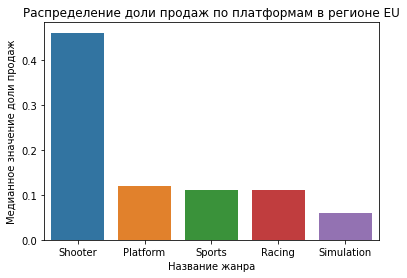

           genre  jp_genre_part
4   Role-Playing           0.36
3       Fighting           0.21
10        Puzzle           0.21
6         Action           0.07
7           Misc           0.07


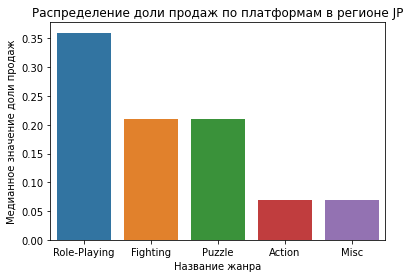

      genre  na_genre_part
0   Shooter           0.46
2  Platform           0.16
1    Sports           0.15
3  Fighting           0.08
8    Racing           0.06


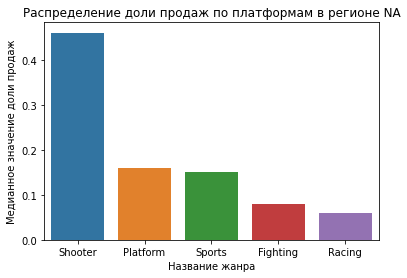

In [93]:
for i in ['eu_genre_part','jp_genre_part','na_genre_part']:
    print(data_genre.loc[:,['genre',i]].sort_values(by=i,ascending=False).head(5))
    sns.barplot(data=data_genre.loc[:,['genre',i]].sort_values(by=i,ascending=False).head(5), x='genre', y=i)
    plt.xlabel("Название жанра")
    plt.ylabel("Медианное значение доли продаж")
    plt.title(f"Распределение доли продаж по платформам в регионе {i[:2].upper()}")
    plt.show()

Посмотрим на топ-5 жанров по каждому региону

По долям продаж в регионе **EU** видно, что в топ-5 входят жанры:  
- Shooter с долей 46%% продаж в регионе;  
- Platform  - 12%;
- Sports - 11%;
- Racing - 11;  
- Misc - 6%

По долям продаж в регионе **JP** видно, что в топ-5 входят жанры:  
- Role-Playing с долей 36%% продаж в регионе;  
- Fighting - 21%; 
- Puzzle - 21%; 
- Action - 7;  
- Misc - 7%

По долям продаж в регионе **NA** видно, что в топ-5 входят жанры:  
- Shooter с долей 46%% продаж в регионе (при этом в регионе **JP** доля продаж данного жанра всего 5%);  
- Platform - 16%;
- Sports - 15%;
- Fighting - 8;  
- Racing - 6%

### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе

In [94]:
data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales','total_sales'],aggfunc='sum').reset_index()

,rating,eu_sales,jp_sales,na_sales,total_sales
0,E,58.06,8.94,50.74,133.13
1,E10+,26.16,4.46,33.23,71.68
2,M,93.44,8.01,96.42,226.54
3,T,34.07,14.78,38.95,99.13
4,unknown,58.95,56.90,64.72,198.97


Из полученных результатов видим, что:  
- самое большое количество продаж для регионов **EU и NA** имеют категорию **М**;  
- для региона **JP** самое большое количество продаж у категории **unknown**;  
- категория **Е10+** имеет меньшее количество продаж во всех трех регионах
- созданная категория **unknown** занимает около 20% во всех регионах, кроме **JP**, там 62% игр не имеют рейтинга

<b>Общий вывод по блоку</b>    

В Регионе <b>EU:</b>    
Наиболее популярной платформой является <b>PS4</b> с долей <b>48%</b> продаж;    
Самые популярные жанры:    
<b>Shooter</b> с долей 46%;    
<b>Platform</b> - 12%;    
<b>Sports</b> - 11%;    
<b>Racing</b> - 11;    
Наибольшее количество продаж имеют игры с возрастрой категорией <b>M</b>    

В Регионе <b>JP:</b>    
Наиболее популярной платформой является <b>3DS</b> с долей <b>47,5%</b> продаж в регионе;    
Самые популярные жанры:    
<b>Role-Playing</b> с долей 36%;    
<b>Fighting</b> - 21%;    
<b>Puzzle</b> - 21%;    
62% игр <b>не имеют рейтинг</b> определения возрастной категории. 15%</b> продаж имеют игры с возрастрой категорией <b>Т</b>    
    
В Регионе <b>NА:</b>     
Наиболее популярной платформой является <b>PS4</b> с долей <b>34,7%</b> продаж в регионе;    
Самые популярные жанры:    
<b>Shooter</b> с долей 46% продаж в регионе (при этом в регионе JP доля продаж данного жанра всего 5%);    
<b>Platform</b> - 16%;    
<b>Sports</b> - 15%;    
Наибольшее количество продаж имеют игры с возрастрой категорией <b>M</b>    

## Проверю гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую гипотезу:  
**Hо:** "Средние показатели двух генеральных совокупностей, а именно пользовательские рейтинги платформ Xbox и PC одинаковые,т.е. равны.  
Тогда альтернативная гипотеза будет:  
**H1:** ""Средние показатели двух генеральных совокупностей, а именно пользовательские рейтинги платформ Xbox и PC не равны".  
При этом не будет иметь значения меньше или больше один показатель чем другой.

In [95]:
results = (st.ttest_ind(data.loc[(data['platform']=='XOne') & (data['user_score'].notna()),'user_score'],
                           data.loc[(data['platform']=='PC') & (data['user_score'].notna()),'user_score'],
                           equal_var = False)
)    
f'p-значение: {results.pvalue}'

'p-значение: 0.11601398086668832'

In [96]:
alpha = 0.05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 11%.  
Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами Xbox и PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулеву гипотезу:  
**Hо:** "Средние показатели двух генеральных совокупностей, а именно пользовательские рейтинги жанров Action и Sports одинаковые,т.е. равны.  
Тогда альтернативная гипотеза будет:  
**H1:** ""Средние показатели двух генеральных совокупностей, а именно пользовательские рейтингижанров Action и Sports равны".  
При этом не будет иметь значения меньше или больше один показатель чем другой.

In [97]:
results = (st.ttest_ind(data.loc[(data['genre']=='Action') & (data['user_score'].notna()),'user_score'],
                           data.loc[(data['genre']=='Sports') & (data['user_score'].notna()),'user_score'],
                           equal_var = False)
)    
f'p-значение: {results.pvalue}'

'p-значение: 1.1825550382644557e-14'

In [98]:
alpha = 0.05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


В результате проведения т-теста мы получили p-уровень значимости меньше 0.05, а значит, можно отклонить нулевую гипотезу о равенстве средних пользовательских рейтингов в жанрах **Action и Sports**

# ВЫВОД

В ходе выполнения проекта моей задачей было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

На первом этапе я познакомился с данными, посмотрел типы и количество данных, определил в каких столбцах есть пропущенные значения.  
Привел столбцы к нижнему регистру.  
На этапе предобработки данных я более подробно проанализировал значения в датасете:  посмотрел пропуски, дубликаты и аномальные значения.  
Строки с отсутствующей датой выхода и названием игры удалил, т.к. их количество составляет менее 5%. 

Разобрался с типами данных:   
Год выхода игры перевел в тип INT для удобства дальнейшей визуализации.  

Проанализировал значения в столбце **Оценка пользователей**. Выявил значения равные **tbd**.  
Основное количество игр с оценкой пользователей = **TBD** приходится на 2008-2011 год. Пик в 2009 году - 405 игр.  
Заменил **TBD** на **NAN**, т.к. по сути оценка не известна и переведу значения в тип **float**.  

**Посчитал суммарные продажи для всех регионов.**  
Для этого создал столбец **total_sales**.
Максимальный объем продаж у игры **Wii Sports** - 82 млн проданных копий;  
средний объем продаж - 0.53 млн копий;   
медиана - 0.17 млн копий.   
Есть игры у которых вообще не было продаж. Таких всего 2 игры: **G1 Jockey 4 2008** и **SCORE International Baja 1000: The Official Game**

**На этапе исследовательского анализа данных:**  
Проверил сколько игр выпускалось в разные годы, чтобы определить важны ли данные за все периоды.  
В результате выяснил, что до 2011 года идет плавный рост количества выпускаемых игр, начиная с 2012 года идет резкое падение, практически в 2 раза и до 2016 года идет спад.

**Проверил как менялись продажи по платформам.**  Выбрал платформы с наибольшими суммарными продажами и построил распределение по годам.  
Наибольшее количество продаж имеют приставки **PS4, PS3, XOne, 3D3 и Х360.**  

Построил распределение продаж по годам среди 6 популярных платформ за все время и за последние 4 года.  
Из графиков видно, что "популярность" платформы падает через **5 лет**.  
Далее взял данные за последние 4 года, чтобы делать прогноз на 5ый.

**Посмотрел как влияют на продажи на разных платформах отзывы пользователей и критиков.**  
Построил диаграмму рассеяния и посчитал корреляцию между отзывами и продажами:  
**Для PS4:**  
Зависимость продаж от оценок критиков прямая, но очень слабая. **Коэф. корреляции 0.4;**  
Зависимость продаж от оценок пользователей практически отсутствует **Коэф. корреляции -0.04;**  
**Для XOne:**  
Зависимость продаж от оценок критиков прямая, но очень слабая. **Коэф. корреляции 0.42;**  
Зависимость продаж от оценок пользователей практически отсутствует. **Коэф. корреляции -0.07;**  
**Для WiiU:**  
Зависимость продаж от оценок критиков прямая, но очень слабая. **Коэф. корреляции 0.37;**  
Зависимость продаж от оценок пользователей прямая, но очень слабая. **Коэф. корреляции 0.4;**  

Таким образом можно сделать вывод, что у рассматриваемых платформ присутствует **прямая, но слабая корреляция** с оценками критиков, но только для **WiiU** есть **слабая прямая корреляция** с оценками пользователей. Для **PS4 и XOne** зависимость родаж от оценок пользователей отсутствует.  

**Посмотрел на общее распределение игр по жанрам:**  
Из полученных результатов вижу, что жанр **Shooter** имеет наибольшую долю продаж, которая составляет **33%.**  
На втором месте жанр **Sports**, который имеет долю продаж **11%.**  
На третьем и четвертом месте с небольшой разницей жанры **Platform и Fighting** с долями **9 и 8%** соотетственно.  
Наименьщие доли продаж имеют жанры **Puzzle, Strategy и Adventure**.  


**Составил портрет пользователя каждого региона:**   
**В Регионе EU**:  
Наиболее популярной платформой является **PS4** с долей **48%** продаж;  
Самые популярные жанры:  
**Shooter** с долей **46%**;  
**Platform - 12%; 
Sports - 11%;  
Racing - 11;**  
Наибольшее количество продаж имеют игры с возрастрой категорией **M**  

**В Регионе JP:**  
Наиболее популярной платформой является **3DS** с долей **47,5%** продаж в регионе;  
Самые популярные жанры:  
**Role-Playing** с долей **36%;  
Fighting - 21%;  
Puzzle - 21%;**  
**62%** игр **не имеют рейтинг** определения возрастной категории. **15%** продаж имеют игры с возрастрой категорией **Т**  

**В Регионе NА:**  
Наиболее популярной платформой является **PS4** с долей **34,7%** продаж в регионе;  
Самые популярные жанры:  
**Shooter** с долей **46%** продаж в регионе;  
**Platform - 16%;  
Sports - 15%;**  
Наибольшее количество продаж имеют игры с возрастрой категорией **M**


**Проверил гипотезы**  
1) Средние показатели двух генеральных совокупностей, а именно пользовательские рейтинги платформ **Xbox и PC** одинаковые,т.е. равны.  
В результате анализа определил, что полученный р-уровень значимости **(0,11)** позволяет сделать предположение о равенстве рейтингов.  

2) Средние пользовательские рейтинги жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») разные:  
В результате анализа определил, что полученный р-уровень значимости **(1.18е-14)** позволяет отбросить гипотезу о равенстве рейтингов в пользу того, что они разные.